# 实现一个简单的神经网络框架

1. 读取图像
2. 设置权重和偏置的初始值（正态分布）
3. 从第一张图片开始计算各个神经单元的加权输入、输出和平方误差
4. 重复3完成所有图片的计算
5. 最优化权重和偏置（反向传播）

In [1]:
import random
class DataLoader:
    def __init__(self,dataset,batch_size,shuffle=False):
        #dataset[0] is X, dataset[1] is y
        self.batch_size=batch_size
        self.dataset=dataset
        if(shuffle):
            random.seed(1)
            random.shuffle(self.dataset[0])
            random.seed(1)
            random.shuffle(self.dataset[1])
    def __iter__(self):
        for i in range(0,len(self.dataset[0]),self.batch_size):
            yield (self.dataset[0][i:i+self.batch_size],self.dataset[1][i:i+self.batch_size])
    pass
import numpy as np
class Mynn():
    #全连接层
    class Linear():
        def __init__(self,input_features,output_features):
            #权重和偏置
            self.bias=np.random.uniform(low=-0.05, high=0.05,
                                    size=(output_features))
            #全连接网络 w存在于每对节点间的连接里
            self.weight=np.random.uniform(low=-0.05, high=0.05,
                                    size=(output_features,input_features))
        def __call__(self,input_data):
            print(input_data)
            print(type(input_data))
            activation=sum((input_data.flatten()*self.weight).T)+self.bias
            return np.array(activation)
    class ReLU():
        def __init__(self):
            pass
        def __call__(self,data):
            relu=lambda x:max(0,x)
            return np.array(list(map(relu,data)))
    class Sigmoid():
        def __init__(self):
            pass
        def __call__(self,data):
            sigmoid=lambda x:1.0/(1+np.exp(-x))
            return np.array(list(map(sigmoid,data)))
    class Gard_ReLU():
        def __init__(self):
            pass
        def __call__(self,y,org_input,r_y=None,fore_ue=np.array([]),fore_weight=None):
            gard_relu=lambda x:1 if x>0 else 0
            diff_relu=np.array(list(map(gard_relu,org_input.flatten())))
            if(fore_ue.all()==None):
                return (y-r_y)*diff_relu
            return sum(np.array([fore_ue]).T*fore_weight
                      )*diff_relu
    class Gard_Sigmoid():
        def __init__(self):
            pass
        def __call__(self,y,org_input,r_y=None,fore_ue=np.array([]),fore_weight=None):
            sigmoid=lambda x:1.0/(1+np.exp(-x))
            gard_sigmoid=lambda num:sigmoid(num)*(1-sigmoid(num))
            diff_sigmoid=np.array(list(map(gard_sigmoid,org_input.flatten())))
            if(fore_ue.all()==None):
                return (y-r_y)*gard_sigmoid
            return sum(np.array([fore_ue]).T*fore_weight)*diff_sigmoid
    class Gard_Default():
        def __init__(self):
            pass
        def __call__(self,data):
            gard_default=lambda x:1

            return np.array(list(map(gard_default,data)))
class MyModel():
    
    def __init__(self):
        self.parament=[]
        self.gard=None
        self.train_loss_all=[]
        pass
    def __call__(self,x):
        return self.forward(x)
    def forward(self,x):
        pass
    def backward(self,inputdata,learning_rate=0.01):
        pass
    def zero_grad(self):
        pass
    def step():
        pass
    def MSELoss(self,output,right_labels):
        mse_sub=np.array([right_labels-output,])
        mse_squ=list(map(lambda x:x**2,mse_sub))
        mse_loss=list(map(lambda x:sum(x)/2,mse_squ))
        
        self.train_loss_all.append(mse_loss)
        pass

    

In [7]:
train_data=[[0,1],[1,2]]
train_loader=DataLoader(dataset=train_data,batch_size=train_data,shuffle=True)
class model(MyModel):
    def __init__(self):
        super(model,self).__init__()
        
        self.hidden1=Mynn.Linear(6,2)
        self.active1=Mynn.ReLU()
        self.hidden1_gard=np.zeros_like(self.hidden1)
        self.hidden1_gard_func=Mynn.Gard_ReLU()
        
        self.hidden2=Mynn.Linear(2,2)
        self.active2=Mynn.ReLU()
        self.hidden2_gard=np.zeros_like(self.hidden2)
        self.hidden2_gard_func=Mynn.Gard_ReLU()
        
        self.re=Mynn.Linear(2,1)
        self.re_active=Mynn.ReLU()
        self.re_gard=np.zeros_like(self.re)
        self.re_gard_func=Mynn.Gard_ReLU()
        
    def forward(self,x):
        self.hidden1_output=self.hidden1(x)
        self.hidden1_output=self.active1(self.hidden1_output)
        self.hidden2_output=self.hidden2(self.hidden1_output)
        self.hidden2_output=self.active2(self.hidden2_output)
        self.re_output=self.re(self.hidden2_output)
        self.re_output=self.re_active(self.re_output)
        return self.re_output
#     def backward(self,y,r_y,input_layer,):#参数y是前向传播最后一层的输出,r_y是正解，
#         self.re_gard=self.re_gard_func(y,self.re_output,r_y=r_y)
#         self.hidden2_gard=self.hidden2_gard_func(y,self.hidden1_output,fore_ue=self.re_gard,fore_weight=self.re.weight)
#         self.hidden1_gard=self.hidden1_gard_func(y,input_layer,fore_ue=self.hidden2_gard,fore_weight=self.hidden2.weight)
#         pass
mlp=model()
ar=np.array([[0,1],[1,2],[3,4]])
output=mlp(ar)
r_y=[1]
print("****************")
print("output:",output)
print("right_y:",r_y)
mlp.MSELoss(output,r_y)
mlp.train_loss_all
#正向传播实现完成


[[0 1]
 [1 2]
 [3 4]]
<class 'numpy.ndarray'>
[0.17711761 0.24518181]
<class 'numpy.ndarray'>
[0 0]
<class 'numpy.ndarray'>
****************
output: [0.02030449]
right_y: [1]


[[0.4799016462251889]]

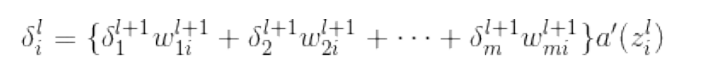

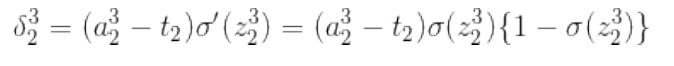